# Central Limit Theorem (CLT) !

Welcome! In this lab, we will be exploring the Central Limit Theorem (CLT)! Although this concept was first developed by Abraham de Moivre in 1733, it wasn’t formally named until 1930, when noted Hungarian mathematician George Polya officially dubbed it the Central Limit Theorem.

## Review: What is the Central Limit Theorem?
Basically, the Central Limit Theorem says:  

If we repeatedly take independent random samples of size n from any population, then when n is large, the distribution of the sample means will approach a normal distribution.

Wow! This works for any population, even non-normal populations.  The CLT is a very useful theorem that is the foundation for many data science procedures. We'll see a lot of these procedures in the upcoming weeks in Data Science DISCOVERY!

Today, we will be working with a "song_data" dataset that has around 19,000 songs which have multiple attributes. This lab will help demonstrate how the Central Limit Theorem works! Below are the 15 attributes of the "song" dataset. 

The Attributes:

- `song_name`: contains the name of the song
- `song_popularity`: how popular a song is
- `song_duration_ms`: length of the song
- `acousticness`: the higher the value, the more acoustic the song is
- `danceability`: the higher the value, the easier it is to dance to this song
- `energy`: the energy of a song, the higher the value, the more energetic
- `instrumentalness`: the higher the value, the less vocals there are
- `key`: key the track is in
- `liveness`: the higher the value, the more of an audience presence there is
- `loudness`: the higher the value, the louder the song (in dB)
- `audiomode`: represents the modality of the track: major is represented by 1 and minor is represented by 0
- `speechiness`: the higher the value, the more presence of spoken words
- `tempo`: the overall estimated tempo of the song
- `time_signature`: an estimated overall time signature of a track
- `audio_valence`: the higher the value, the more positive it is

# Part 0 | Your Group!

Edit the next Python cell to add information about who you're working within your lab section:

In [ ]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = ""
ca1_name = ""
ca2_name = ""


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = ""
partner1_netid = ""
partner1_major = ""

partner2_name = ""
partner2_netid = ""
partner2_major = ""

partner3_name = ""
partner3_netid = ""
partner3_major = ""

# Part 1 | Exploratory Data Analysis

### Puzzle 1.1: Import the dataset
In the same folder as this notebook find the dataset `song_data.csv` that is provided. You know what to do to import the libraries and read the data! :)

In [1]:
import pandas as pd
df = pd.read_csv("song_data.csv")


### Puzzle 1.2 Find Descriptive Statistics
Let's do some basic EDA to start. Find the mean, median, standard deviation, first quartile, and third quartile for each of the attributes. Quantiles are the same thing as quartiles that we talked about in class. *You will need some of these values later so make sure to store them as variables!*

In [3]:
df_mean = df.mean()
df_median = df.median()
df_sd = df.std()
df_quartile1st = df.quantile(.25)
df_quartile3rd = df.quantile(.75)


C:\Users\aliya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
C:\Users\aliya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\aliya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Thi

In [4]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(round(df_mean[0],0) == 53), "The mean value is not correct!"
assert(round(df_median[0],0) == 56), "The median value is not correct!"
assert(round(df_sd[0],0) == 22), "The standard deviation value is not correct!"
assert(round(df_quartile1st[0],0) == 40), "The first quartile value is not correct!"
assert(round(df_quartile3rd[0],0) == 69), "The third quartiile value is not correct!"
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.3 Histograms for the Dataset

Plot the histograms for each column. Which column(s) look closest to the normal distribution? Calcuate the mean and standard deviation for these columns.

- If needed: In `df.hist`, use `figsize=(50, 30)` to make your figure bigger.


array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'song_duration_ms'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'audio_mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

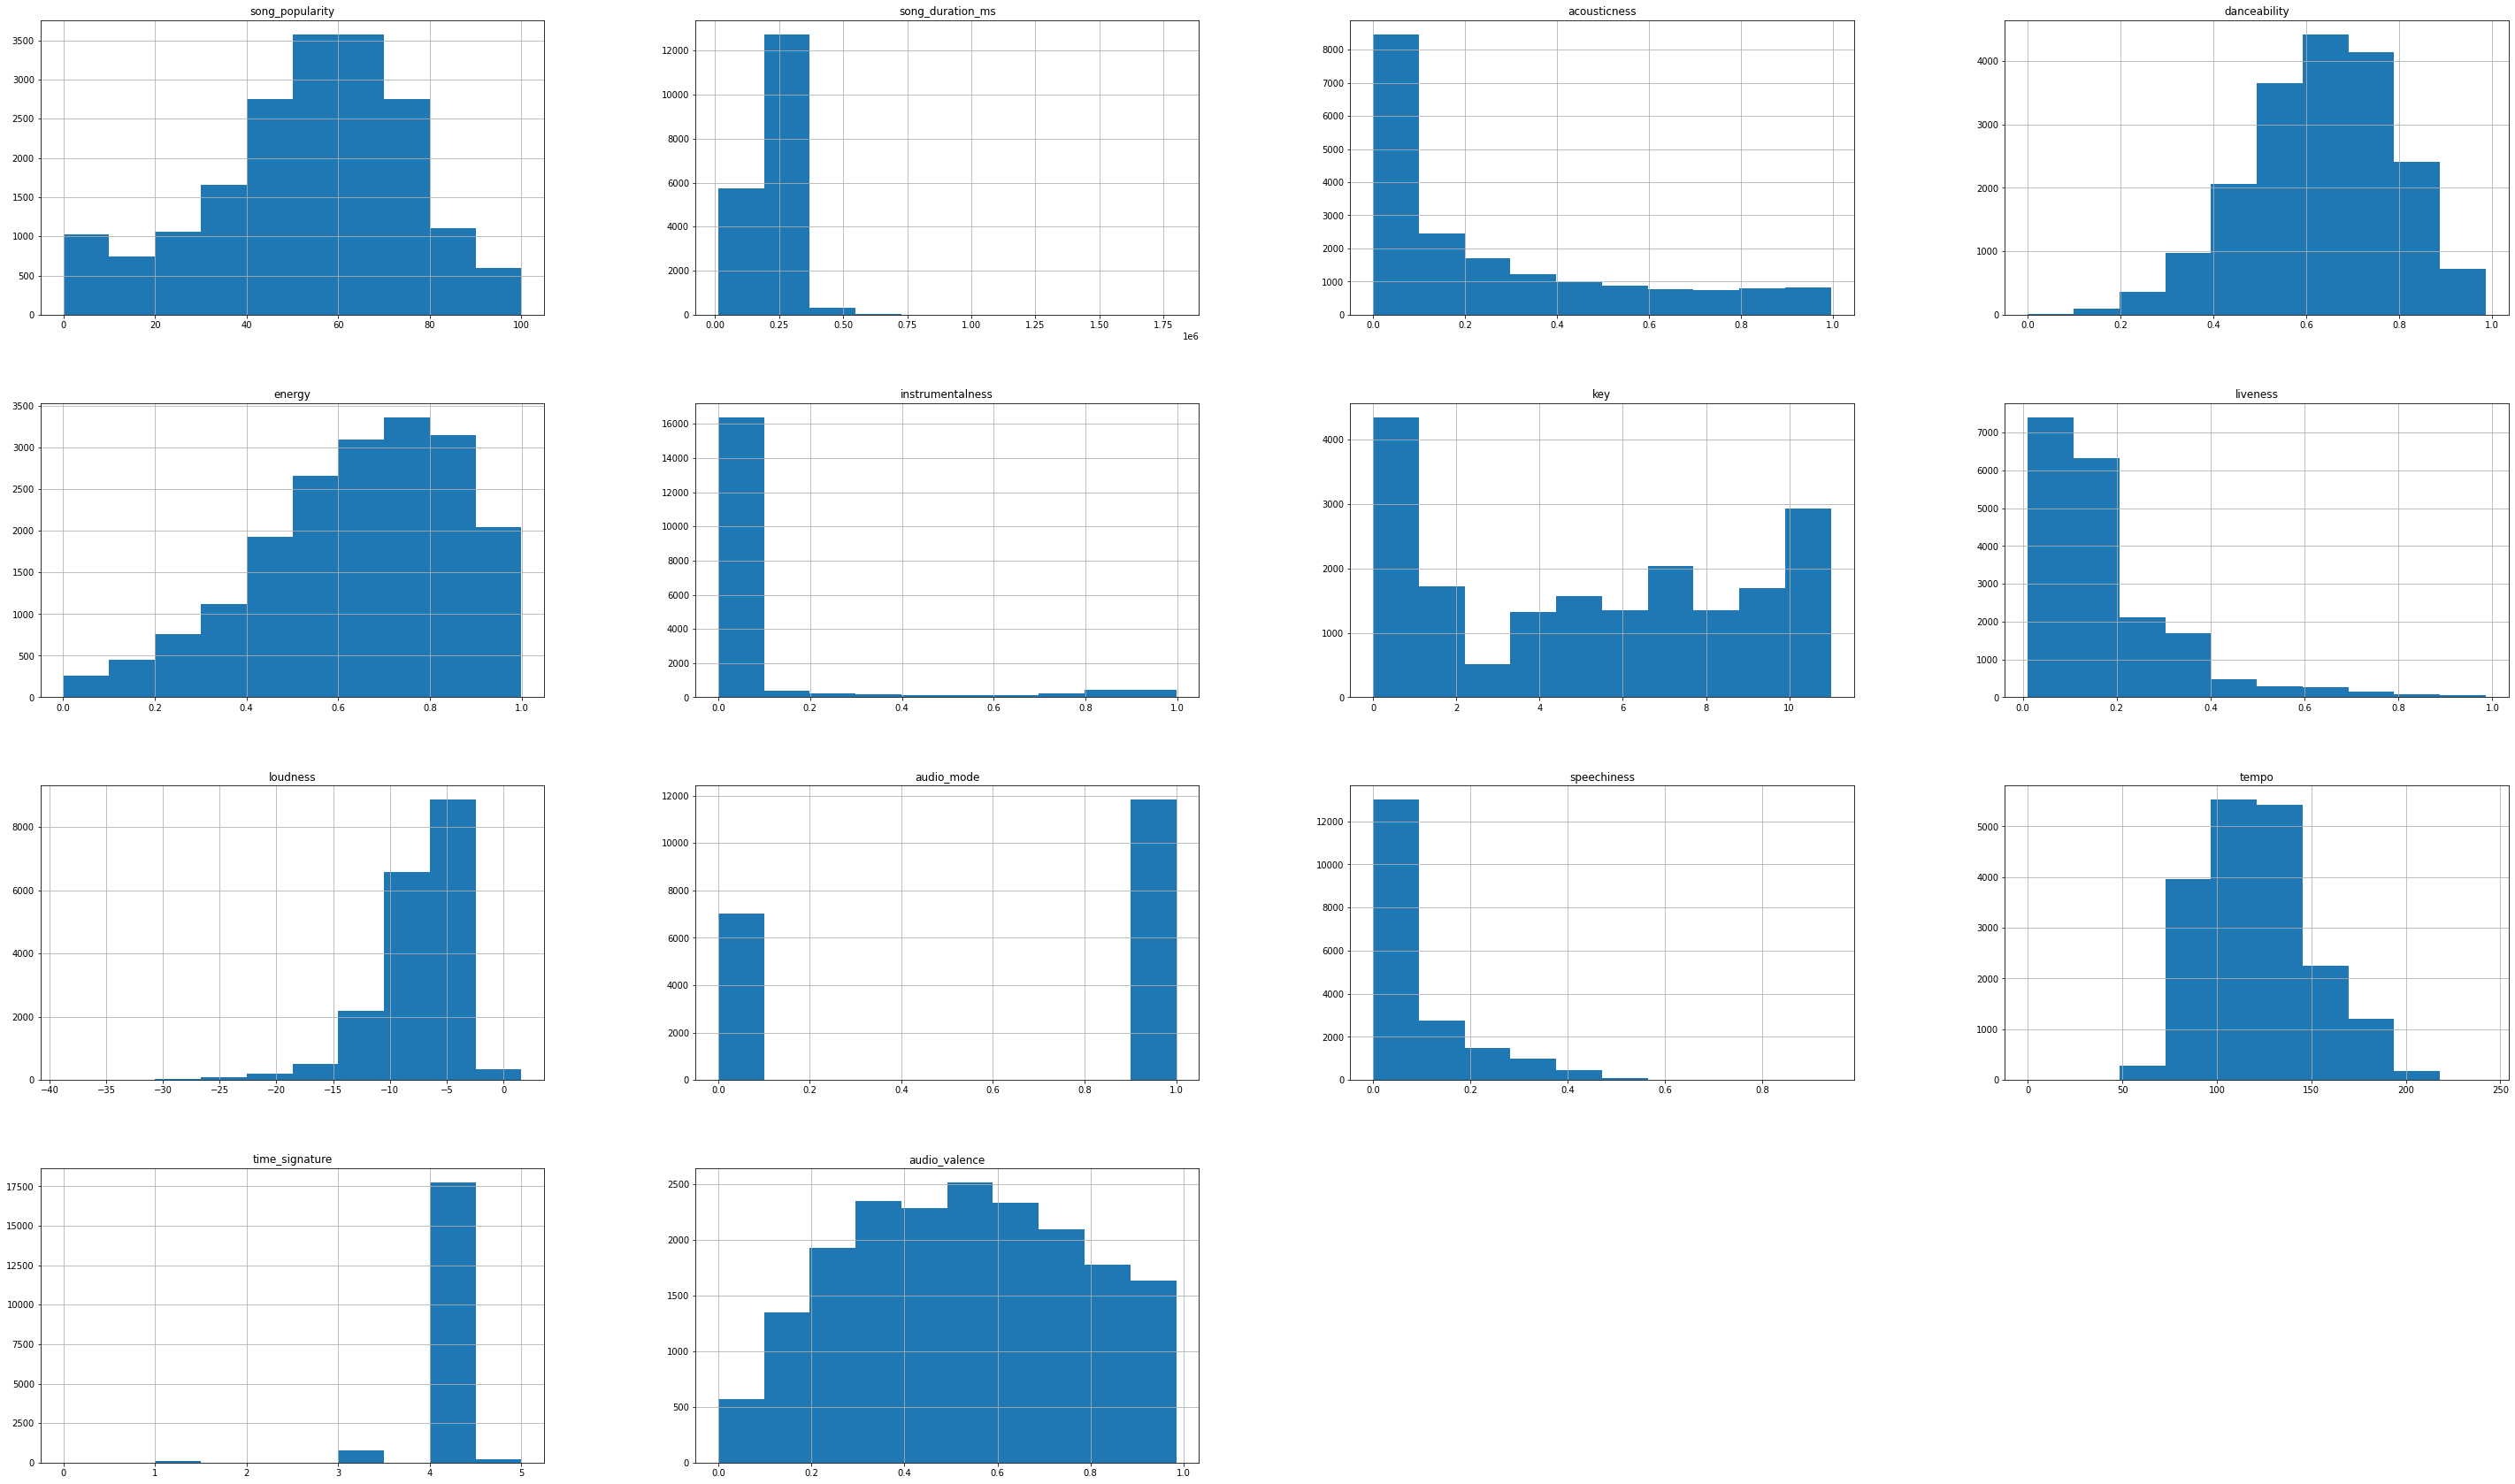

In [5]:
df.hist(figsize = (50,30))


### Puzzle 1.4

❓ **Group Discussion Question** ❓ Discuss the histograms from puzzle 1.2 in your group. Do the distributions of these song attributes seem reasonable in terms of symmetry, skewness, etc. based on what you already know about these attributes?


# Part 2 | Simulating Song Data Set

### Puzzle 2.1:
Now, we will see the beauty of the Central Limit Theorem.  

Define a funciton called `simulate_average` that will simulate playing `n` random songs and return the average value of these `n` songs for a given column. For example, the column may be `'danceability'` and your function should return the average `'danceability'` for the `n` songs.

In [8]:
### simulate_average ###
def simulate_average(column, n):
    return df[column].sample(n).mean()


### Puzzle 2.2: Approximating The Normal Distribution

Plot the histogram for the column `loudness` and `danceability`. Then using the `simulate_average` function we defined before, use the column `loudness` to run the simulation **100** times with `n = 1000`.  Store the results in a dataframe and plot the histogram to see the results.  Repeat this with the variable `danceability`.  Finally, repeat the process **10000** times for both variables and see the results.

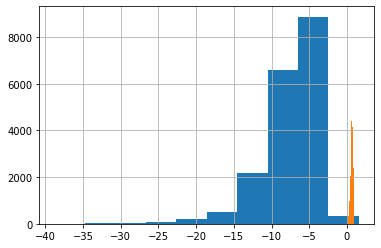

In [10]:
# plot your histograms here
loudness_hist = df["loudness"].hist()
danceability_hist = df["danceability"].hist()

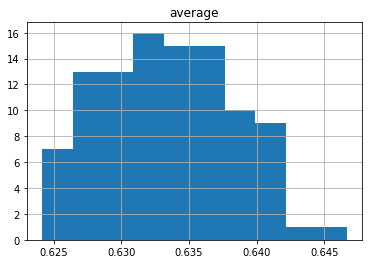

In [13]:
# run the simulation for danceability 100 times
data = []
for i in range(100):
    d = {"average": simulate_average("danceability", 1000)}
    data.append(d)

#create a dataframe
df_danceability_100 = pd.DataFrame(data)

#store your histogram 
x= df_danceability_100.hist()

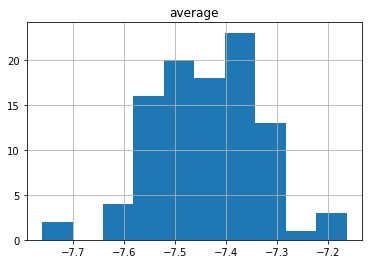

In [14]:
# run the simulation for loudness 100 times
data = []
for i in range(100):
    d = {"average": simulate_average("loudness", 1000)}
    data.append(d)
    

#create a dataframe
df_loudness_100 = pd.DataFrame(data)

#store your histogram 
x= df_loudness_100.hist()

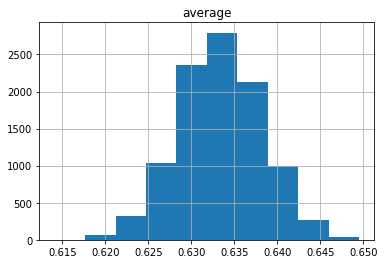

In [15]:
# run the simulation for danceability 10000 times
data = []
for i in range(10000):
    d = {"average": simulate_average("danceability", 1000)}
    data.append(d)

#create a dataframe
df_danceability_10000 = pd.DataFrame(data)

#store your histogram 
x= df_danceability_10000.hist()

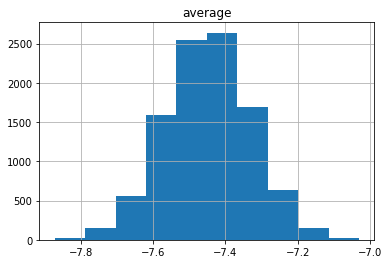

In [16]:
# run the simulation for loudness 10000 times
data = []
for i in range(10000):
    d = {"average": simulate_average("loudness", 1000)}
    data.append(d)

#create a dataframe
df_loudness_10000 = pd.DataFrame(data)

#store your histogram 
x= df_loudness_10000.hist()

In [17]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( (0.62 <= df_danceability_100.mean()).bool() & (df_danceability_100.mean() <= 0.68).bool() ), "The simulation is not correct!"
assert( (-7.6 <= df_loudness_100.mean()).bool() & (df_loudness_100.mean() <= -7.3).bool() ), "The simulation is not correct!"
assert( (0.62 <= df_danceability_10000.mean()).bool() & (df_danceability_10000.mean() <= 0.68).bool() ), "The simulation is not correct!"
assert( (-7.6 <= df_loudness_10000.mean()).bool() & (df_loudness_10000.mean() <= -7.3).bool() ), "The simulation is not correct!"
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3 - Individual Reflection

❓ **Individual Reflection Question** ❓ What change do you notice in the histograms of `loudness` and `danceability` as we increase `n`?

The histograms start to resemble a normal curve (lower on both ends with the most height in the middle)

# Part 3 | Claim Counts
Earlier in this lab, we talked about how the Central Limit Theorem holds true even for non-normal distributions! We can see this in another common distribution called the Poisson Distribution. 

Although we don't cover this in DISCOVERY, the Poisson distribution [https://en.wikipedia.org/wiki/Poisson_distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a commonly used discrete probability distribution. It's commonly used due to its simple form that only requires one parameter, which is often estimated by the mean. Suppose that an average number of claims that ABC Insurance Company gets is 0.4 per day and the number of claims follows a Poisson distribution. Run the cell below to see the distribution of the number of claims per day.

<AxesSubplot:>

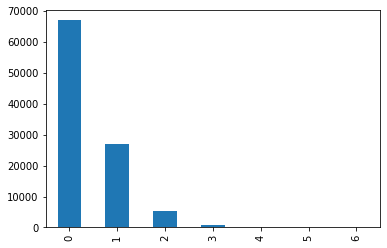

In [18]:
import numpy as np
# 100000 random numbers drawn from Poisson distribution with mean 0.4
x = pd.Series(np.random.poisson(0.4,100000))
x.value_counts().plot.bar()

### Puzzle 3.1
Next, we will look at the number of claims per month, per quarter, and per year. The code given below gives you `df_day`, the number of claims that ABC Insurance Company received daily over their history of 276 years in business. From this dataframe, create `df_week`, `df_month`, and `df_quarter` for the number of claims that ABC insurance company received per week, month, and quarter, respectively. 

**HINT:** Use `group_by`.

In [19]:
## Run this cell first!

np.random.seed(107)
nsim = 100800
df_day = pd.DataFrame({'claims':np.random.poisson(0.4,nsim)})
df_day['week'] = sorted(list(range(0,int(nsim/7) ))*7)
df_day['month'] = sorted(list(range(0,int(nsim/30) ))*30)
df_day['quarter'] = sorted(list(range(0,int(nsim/90) ))*90)

In [23]:
df_week = df_day.groupby("week").sum().reset_index()

In [22]:
df_month = df_day.groupby("month").sum().reset_index()

In [21]:
df_quarter = df_day.groupby("quarter").sum().reset_index()

In [24]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( abs(df_week.claims.mean() - 2.800416666666) < 1e-6 ), "Check df_week!"
assert( abs(df_month.claims.mean() - 12.00178571428) < 1e-6 ), "Check df_month!"
assert( abs(df_quarter.claims.mean() - 36.00535714285714) < 1e-6 ), "Check df_quarter!"
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Histograms for the dataframes
Plot the histogram of `claims` for `df_week`, `df_month`, and `df_quarter` and compare the distributions.

array([[<AxesSubplot:title={'center':'quarter'}>,
        <AxesSubplot:title={'center':'claims'}>],
       [<AxesSubplot:title={'center':'week'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

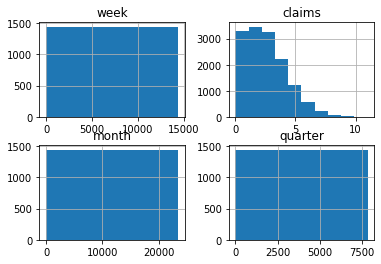

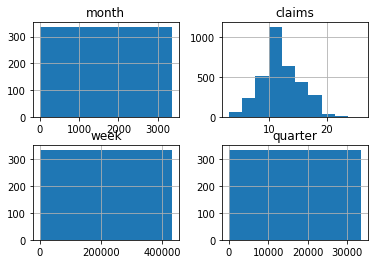

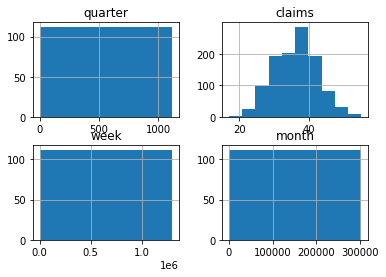

In [25]:
df_week.hist()
df_month.hist()
df_quarter.hist()

### Puzzle 3.3
❓ **Group Discussion Question** ❓We saw the CLT in action in Puzzle 3.2.  Give an example of the Central Limit Theorem using a real-world scenario and share it with your group.  

❓ **Individual Reflection Question** ❓ Write down an interesting idea from your group discussion.

Something that I can think of that CLT could be useful for is getting information like life expectancy throughout the world.  

Also, I thought you might think this is funny, Heman: one of the statistics guys through this lab is named Poisson, which is actually fish in French.  When I was in middle school, I actually played the chef in The Little Mermaid Jr. that sang that song ("Les Poissons").  Check it out if you don't know it lol, but you unlocked a memory I had forgotten about.

## Submit Your Work!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!